If things don’t go your way in predictive modeling, use XGboost.  XGBoost algorithm has become the ultimate weapon of many data scientist. It’s a highly sophisticated algorithm, powerful enough to deal with all sorts of irregularities of data.
<br /><br />
Building a model using XGBoost is easy. But, improving the model using XGBoost is difficult. This algorithm uses multiple parameters. To improve the model, parameter tuning is must. It is very difficult to get answers to practical questions like – Which set of parameters you should tune ? What is the ideal value of these parameters to obtain optimal output ?
<br /><br />
XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm. 
<br /><br />
### The XGBoost Advantage
1. Regularization:
    - Standard GBM implementation has no [regularization](https://www.analyticsvidhya.com/blog/2015/02/avoid-over-fitting-regularization/) like XGBoost, therefore it also helps to reduce overfitting.
    - In fact, XGBoost is also known as a 'regularized boosting' technique.
<br /><br />
2. Parallel Processing:
    - XGBoost implements parallel processing and is blazingly faster as compared to GBM.
    - But hang on, we know that boosting is a sequential process so how can it be parallelized? We know that each tree can be built only after the previous one, so what stops us from making a tree using all cores? Extra: [Parallel Gradient Boosting Decision Trees](http://zhanpengfang.github.io/418home.html)
    - XGBoost also supports implementation on Hadoop.
<br /><br />
3. High Flexibility
    - XGBoost allows users to define custom optimization objectives and evaluation criteria.
    - This adds a whole new dimension to the model and there is no limit to what we can do.
<br /><br />
4. Handling Missing Values
    - XGBoost has an in-built routine to handle missing values.
    - The user is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.
<br /><br />
5. Tree Pruning:
    - A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
    - XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
    - Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.
<br /><br />
6. Built-in Cross-Validation
    - XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
    - This is unlike GBM where we have to run a grid-search and only a limited values can be tested.
<br /><br />
7. Continue on Existing Model
    - User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.
    - GBM implementation of sklearn also has this feature so they are even on this point.


### XGBoost Parameters

The overall parameters have been divided into 3 categories by XGBoost authors:

1. <b>General Parameters:</b> Guide the overall functioning
2. <b>Booster Parameters:</b> Guide the individual booster (tree/regression) at each step
3. <b>Learning Task Parameters:</b> Guide the optimization performed

### General Parameters
These define the overall functionality of XGBoost.
<br /><br />
1. <b>booster [default=gbtree]</b>
    - Select the type of model to run at each iteration. It has 2 options:
        - gbtree: tree-based models
        - gblinear: linear models
<br /><br />
2. <b>silent [default=0]</b>
    - Silent mode is activated is set to 1, i.e. no running messages will be printed.
    - It’s generally good to keep it 0 as the messages might help in understanding the model.
<br /><br />
3. <b>nthread [default to maximum number of threads available if not set]</b>
    - This is used for parallel processing and number of cores in the system should be entered
    - If you wish to run on all cores, value should not be entered and algorithm will detect automatically

<br />   
There are 2 more parameters which are set automatically by XGBoost and you need not worry about them. Lets move on to Booster parameters.

### Booster Parameters

Though there are 2 types of boosters, I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.
<br /><br />
1. eta [default=0.3]
    - Analogous to learning rate in GBM
    - Makes the model more robust by shrinking the weights on each step
    - Typical final values to be used: 0.01-0.2
<br /><br />
2. min_child_weight [default=1]
    - Defines the minimum sum of weights of all observations required in a child.
    - This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
    - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
    - Too high values can lead to under-fitting hence, it should be tuned using CV.
<br /><br />
3. max_depth [default=6]
    - The maximum depth of a tree, same as GBM.
    - Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
    - Should be tuned using CV.
    - Typical values: 3-10
<br /><br />
4. max_leaf_nodes
    - The maximum number of terminal nodes or leaves in a tree.
    - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
    - If this is defined, GBM will ignore max_depth.
<br /><br />
5. gamma [default=0]
    - A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
    - Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
<br /><br />
6. max_delta_step [default=0]
    - In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative.
    - Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced.
    - This is generally not used but you can explore further if you wish.
<br /><br />
7. subsample [default=1]
    - Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.
    - Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
    - Typical values: 0.5-1
<br /><br />
8. colsample_bytree [default=1]
    - Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.
    - Typical values: 0.5-1
<br /><br />
9. colsample_bylevel [default=1]
    - Denotes the subsample ratio of columns for each split, in each level.
    - I don’t use this often because subsample and colsample_bytree will do the job for you. but you can explore further if you feel so.
<br /><br />
10. lambda [default=1]
    - L2 regularization term on weights (analogous to Ridge regression)
    - This used to handle the regularization part of XGBoost. Though many data scientists don’t use it often, it should be explored to reduce overfitting.
<br /><br />
11. alpha [default=0]
    - L1 regularization term on weight (analogous to Lasso regression)
    - Can be used in case of very high dimensionality so that the algorithm runs faster when implemented
<br /><br />
12. scale_pos_weight [default=1]
    - A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.

### Learning Task Parameters

These parameters are used to define the optimization objective the metric to be calculated at each step.
<br /><br />
1. objective [default=reg:linear]
    - This defines the loss function to be minimized. Mostly used values are:
        - binary:logistic –logistic regression for binary classification, returns predicted probability (not class)
        - multi:softmax –multiclass classification using the softmax objective, returns predicted class (not probabilities)
            - you also need to set an additional num_class (number of classes) parameter defining the number of unique classes
        - multi:softprob –same as softmax, but returns predicted probability of each data point belonging to each class.
<br /><br />
2. eval_metric [ default according to objective ]
    - The metric to be used for validation data.
    - The default values are rmse for regression and error for classification.
    - Typical values are:
        - rmse – root mean square error
        - mae – mean absolute error
        - logloss – negative log-likelihood
        - error – Binary classification error rate (0.5 threshold)
        - merror – Multiclass classification error rate
        - mlogloss – Multiclass logloss
        - auc: Area under the curve
<br /><br />
3. seed [default=0]
    - The random number seed.
    - Can be used for generating reproducible results and also for parameter tuning.

<br />
If you’ve been using Scikit-Learn till now, these parameter names might not look familiar. A good news is that xgboost module in python has an sklearn wrapper called XGBClassifier. It uses sklearn style naming convention. The parameters names which will change are:
<br /><br />
eta –> learning_rate
<br />
lambda –> reg_lambda
<br />
alpha –> reg_alpha
<br /><br />
You must be wondering that we have defined everything except something similar to the “n_estimators” parameter in GBM. Well this exists as a parameter in XGBClassifier. However, it has to be passed as “num_boosting_rounds” while calling the fit function in the standard xgboost implementation.

### Parameter Tuning

#### Data Preparation refer another Parameter Tuning Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn import metrics

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = pd.read_csv('train_modified.csv')
target = 'Disbursed'
IDcol = 'ID'

Note that I have imported 2 forms of XGBoost:
<br /><br />
<b>xgb</b> – this is the direct xgboost library. I will use a specific function “cv” from this library
<br />
<b>XGBClassifier</b> – this is an sklearn wrapper for XGBoost. This allows us to use sklearn’s Grid Search with parallel processing in the same way we did for GBM

Before proceeding further, lets define a function which will help us create XGBoost models and perform cross-validation. 
#### This function can be resuse for your own models.

In [2]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

Note that xgboost’s sklearn wrapper doesn’t have a “feature_importances” metric but a [get_fscore()](https://discuss.analyticsvidhya.com/t/xgboost-feature-importance/54638/4) function which does the same job.

### General Approach for Parameter Tuning

1. Choose a relatively <b>high learning rate.</b> Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the <b>optimum number of trees for this learning rate.</b> XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
2. <b>Tune tree-specific parameters</b> ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
3. <b>Tune regularization parameters</b> (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
4. <b>Lower the learning rate</b> and decide the optimal parameters .

### Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

Initial estimates:
<br /><br />
1. max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.
<br />
2. min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
<br />
3. gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
<br />
4. subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
<br />
5. scale_pos_weight = 1: Because of high class imbalance.

<br />
Note that all the above are just initial estimates and will be tuned later. Lets take the default learning rate of 0.1 here and check the optimum number of trees using cv function of xgboost. The function defined above will do it for us.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.899283


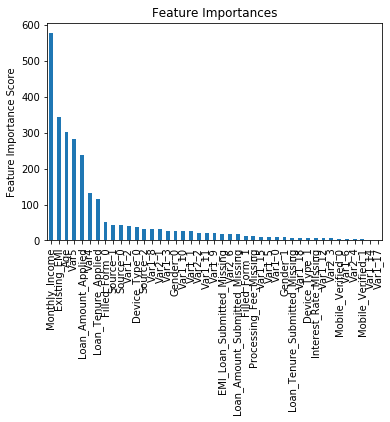

In [17]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb1, train, predictors)

By using the codes above, we couldn't find the n_estimators. Let's try it this way.

Best: -0.063541 using {'n_estimators': 100}
-0.065765 (0.000397) with: {'n_estimators': 50}
-0.063541 (0.000584) with: {'n_estimators': 100}
-0.063657 (0.000687) with: {'n_estimators': 150}
-0.064015 (0.000766) with: {'n_estimators': 200}
-0.064428 (0.000761) with: {'n_estimators': 250}
-0.064827 (0.000961) with: {'n_estimators': 300}
-0.065379 (0.001009) with: {'n_estimators': 350}


Text(0, 0.5, 'Log Loss')

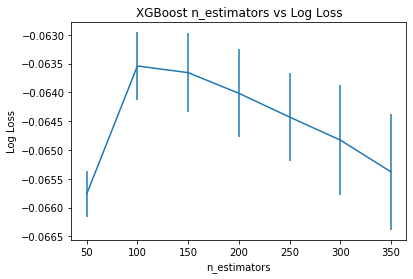

In [4]:
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot

predictors = [x for x in train.columns if x not in [target, IDcol]]
# grid search
xgb2 = XGBClassifier(learning_rate =0.1, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
grid_search = GridSearchCV(xgb2, param_grid, scoring="neg_log_loss", n_jobs=4, cv=kfold)
grid_result = grid_search.fit(train[predictors],train[target])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

Here we got 100 as the optimal estimators for 0.1 learning rate. Note that this value might be too high for you depending on the power of your system. In that case you can increase the learning rate and re-run the command to get the reduced number of estimators.

### Step 2: Tune max_depth and min_child_weight

We tune these first as they will have the highest impact on model outcome. To start with, let’s set wider ranges and then we will perform another iteration for smaller ranges.

In [5]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([12.37365179, 12.17268977, 11.95875731, 20.00143495, 20.33006949,
         17.82601142, 25.38801475, 24.78000946, 24.19993687, 32.40153189,
         31.51601882, 27.81001673]),
  'std_fit_time': array([0.13714813, 0.2242607 , 0.1404813 , 0.90791805, 0.77129721,
         0.43250973, 0.43623013, 0.37174207, 0.51588432, 0.66182075,
         0.98308966, 3.7690391 ]),
  'mean_score_time': array([0.09400148, 0.10600152, 0.10000124, 0.1117662 , 0.1160007 ,
         0.10000162, 0.11400137, 0.09600129, 0.11200109, 0.12999363,
         0.13000355, 0.10600133]),
  'std_score_time': array([0.01959765, 0.01019927, 0.01265004, 0.03005133, 0.01743412,
         0.00894554, 0.02245025, 0.00489884, 0.02227116, 0.00894374,
         0.01095257, 0.01356412]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

The ideal values are 5 for max_depth and 1 for min_child_weight. Lets go one step deeper and look for optimum values. We’ll search for values 1 above and below the optimum values because we took an interval of two.

In [6]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=100, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([15.67380066, 14.98090863, 15.25551786, 19.01884618, 18.84828901,
         18.75751114, 21.66814022, 21.73048539, 18.44816766]),
  'std_fit_time': array([0.21300135, 0.21379928, 0.27100727, 0.38411396, 0.47226904,
         0.62911884, 0.32032601, 0.44781957, 4.57723917]),
  'mean_score_time': array([0.12205696, 0.12404056, 0.11179032, 0.11251822, 0.15228591,
         0.12844858, 0.1159966 , 0.10784202, 0.10400114]),
  'std_score_time': array([0.0218369 , 0.03273546, 0.0242435 , 0.01783033, 0.05141785,
         0.04007109, 0.02726855, 0.01030502, 0.025767  ]),
  'param_max_depth': masked_array(data=[4, 4, 4, 5, 5, 5, 6, 6, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],


Here, we get the optimum values as 5 for max_depth and 6 for min_child_weight. You would have noticed that here we got 6 as optimum value for min_child_weight but we haven’t tried values more than 6. We can do that as follow:

In [10]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=100, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(train[predictors],train[target])
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([19.65211635, 19.10586996, 18.87075505, 18.90621424]),
  'std_fit_time': array([0.11275776, 0.18483991, 0.28082801, 0.08628788]),
  'mean_score_time': array([0.1139771 , 0.13400064, 0.10847912, 0.10000267]),
  'std_score_time': array([0.02062389, 0.01959428, 0.00795943, 0.02097604]),
  'param_min_child_weight': masked_array(data=[6, 8, 10, 12],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_child_weight': 6},
   {'min_child_weight': 8},
   {'min_child_weight': 10},
   {'min_child_weight': 12}],
  'split0_test_score': array([0.83204874, 0.83285726, 0.83034308, 0.83099757]),
  'split1_test_score': array([0.83345274, 0.83143328, 0.83091906, 0.83168878]),
  'split2_test_score': array([0.84533552, 0.84870026, 0.84868574, 0.84886376]),
  'split3_test_score': array([0.84932832, 0.84942128, 0.84906957, 0.84892539]),
  'split4_test_score': array([0.8429566 , 0.84213222, 0.83787702, 0.83971603]),

Looks like param test 1 has the best result 

### Step 3: Tune gamma

Now lets tune gamma value using the parameters already tuned above. Gamma can take various values but we check for 5 values here. You can go into more precise values as you think it fits. 

In [11]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([18.83288164, 18.50552077, 18.5871973 , 18.50213237, 15.80032935]),
  'std_fit_time': array([0.17235805, 0.13813395, 0.30280387, 0.39498867, 4.91919591]),
  'mean_score_time': array([0.11545339, 0.11315842, 0.12873168, 0.1099999 , 0.10237622]),
  'std_score_time': array([0.02514617, 0.01405223, 0.0134642 , 0.01673244, 0.03146563]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.83318025, 0.83156436, 0.83261725, 0.83258442, 0.83221724]),
  'split1_test_score': array([0.8334019 , 0.83331501, 0.83615631, 0.8321704 , 0.8323257 ]),
  'split2_test_score': array([0.84827801, 0.84599068, 0.84698599, 0.84644814, 0.84694048]),
  'split3_test_score': array([0.84987291, 0.84912846, 0.84999651, 0.84860227, 0.849465

Gamma = 0.2 is the optimum one. 

### Step 4: Tune subsample and colsample_bytree

The next step would be try different subsample and colsample_bytree values. Lets do this in 2 stages as well and take values 0.6,0.7,0.8,0.9 for both to start with.

In [18]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([17.98351588, 17.10402708, 15.15031333, 15.1000092 , 17.48800912,
         17.30001364, 16.82445345, 16.18710232, 19.37178855, 19.31191792,
         19.59068737, 20.31479421, 24.14257698, 20.79513865, 20.10001149,
         17.6420104 ]),
  'std_fit_time': array([0.70574359, 0.47772109, 0.64892252, 0.43621156, 0.45512192,
         0.28531522, 0.32007388, 0.67302103, 0.34695951, 0.2711337 ,
         0.74995223, 0.8401381 , 1.18650712, 0.17954888, 0.34461579,
         2.43568122]),
  'mean_score_time': array([0.14893656, 0.11206779, 0.10800238, 0.11200409, 0.12200437,
         0.10599689, 0.11800237, 0.11073899, 0.10600057, 0.10599966,
         0.11566057, 0.1131907 , 0.15968623, 0.12000084, 0.11200051,
         0.08800192]),
  'std_score_time': array([0.04703617, 0.01342869, 0.00748563, 0.01165762, 0.02481456,
         0.01497212, 0.02713132, 0.00906557, 0.01356435, 0.01743577,
         0.0346786 , 0.01168417, 0.0800001 , 0.01897377, 0.0116622 ,
         0.017204

Here, we found 0.8 as the optimum value for both subsample and colsample_bytree. Now we should try values in 0.05 interval around these.

In [21]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.cv_results_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([18.02691169, 17.76771402, 17.82701688, 18.71653147, 18.5492106 ,
         18.63058743, 19.42117314, 19.09799213, 16.07400823]),
  'std_fit_time': array([0.17190648, 0.29493352, 0.2973735 , 0.52879093, 0.0782265 ,
         0.51666169, 0.21042485, 0.22927737, 4.79636302]),
  'mean_score_time': array([0.12000041, 0.11799955, 0.12199993, 0.12000141, 0.11600013,
         0.1180006 , 0.0980011 , 0.10000105, 0.10200081]),
  'std_score_time': array([0.00894394, 0.02785519, 0.01469682, 0.03794701, 0.0079991 ,
         0.01599849, 0.01326659, 0.01414273, 0.03429315]),
  'param_colsample_bytree': masked_array(data=[0.75, 0.75, 0.75, 0.8, 0.8, 0.8, 0.85, 0.85, 0.85],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.75, 0.8, 0.85, 0.75, 0.8, 0.85, 0.75, 0.8, 0.85],
               mask=[False, False, False, False, False, Fa

Again we got the same values as before. Thus the optimum values are:

- subsample: 0.8
- colsample_bytree: 0.8

### Step 5: Tuning Regularization Parameters

Next step is to apply regularization to reduce overfitting. Though many people don’t use this parameters much as gamma provides a substantial way of controlling complexity. But we should always try it. I’ll tune ‘reg_alpha’ value here. We can also try different values of ‘reg_lambda’.

In [22]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

C:\Users\Kerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([20.55802722, 19.45217719, 20.7226408 , 20.89133644, 13.37146177]),
  'std_fit_time': array([0.39901372, 0.55508019, 1.130118  , 0.31293087, 3.78165365]),
  'mean_score_time': array([0.1804348 , 0.11554003, 0.15900617, 0.14966922, 0.08078604]),
  'std_score_time': array([0.08254758, 0.01631703, 0.03302374, 0.02523159, 0.02592432]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.83261725, 0.83174238, 0.83410287, 0.83137152, 0.79018273]),
  'split1_test_score': array([0.83615631, 0.83403033, 0.83183869, 0.8322022 , 0.79435608]),
  'split2_test_score': array([0.84698599, 0.84590206, 0.84677161, 0.84611576, 0.82339381]),
  'split3_test_score': array([0.84999651, 0.84981963, 0.8470

reg_alpha = 0.00001

### Step 6: Reducing Learning Rate

Lastly, we should lower the learning rate and add more trees. Lets use the cv function of XGBoost to do the job again.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.900821


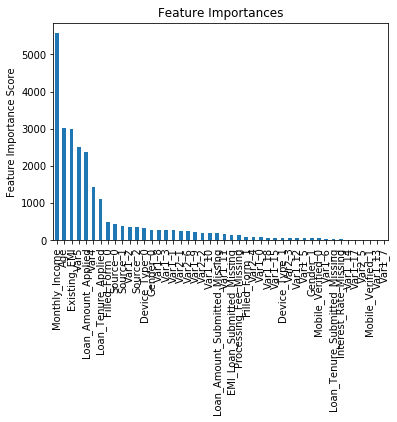

In [23]:
xgb3 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.00001,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)

The score improved.